# TC PRIMED analysis with GPM-API

In this tutorial you will learn how to explore the [TC PRIMED](https://rammb-data.cira.colostate.edu/tcprimed/) files using GPM-API.
As an example, we will use a GPM DPR/GMI overpass of Hurricane Ida on 2021-08-29 at the moment of his landfall in New Orlens.
 

Now let's import the package required in this tutorial.

In [ ]:
import fsspec
import matplotlib.pyplot as plt

import gpm

/home/ghiggi/micromamba/envs/gpm-api-dev/lib/python3.11/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


## 1. Search TC PRIMED files

Now let's list the TC PRIMED overpass available for Hurricane Ida.

In [ ]:
fs_args = {}
_ = fs_args.setdefault("anon", True)
fs = fsspec.filesystem("s3", **fs_args)
bucket_path = "s3://noaa-nesdis-tcprimed-pds/v01r01/final/2021/AL/09/"
fs.ls(bucket_path)

['noaa-nesdis-tcprimed-pds/v01r01/final/2021/AL/09/TCPRIMED_v01r01-final_AL092021_AMSR2_GCOMW1_049341_20210826181631.nc',
 'noaa-nesdis-tcprimed-pds/v01r01/final/2021/AL/09/TCPRIMED_v01r01-final_AL092021_AMSR2_GCOMW1_049356_20210827190056.nc',
 'noaa-nesdis-tcprimed-pds/v01r01/final/2021/AL/09/TCPRIMED_v01r01-final_AL092021_AMSR2_GCOMW1_049363_20210828070955.nc',
 'noaa-nesdis-tcprimed-pds/v01r01/final/2021/AL/09/TCPRIMED_v01r01-final_AL092021_AMSR2_GCOMW1_049378_20210829075200.nc',
 'noaa-nesdis-tcprimed-pds/v01r01/final/2021/AL/09/TCPRIMED_v01r01-final_AL092021_AMSR2_GCOMW1_049385_20210829185046.nc',
 'noaa-nesdis-tcprimed-pds/v01r01/final/2021/AL/09/TCPRIMED_v01r01-final_AL092021_AMSR2_GCOMW1_049400_20210830193424.nc',
 'noaa-nesdis-tcprimed-pds/v01r01/final/2021/AL/09/TCPRIMED_v01r01-final_AL092021_AMSR2_GCOMW1_049407_20210831073754.nc',
 'noaa-nesdis-tcprimed-pds/v01r01/final/2021/AL/09/TCPRIMED_v01r01-final_AL092021_AMSR2_GCOMW1_049414_20210831184007.nc',
 'noaa-nesdis-tcprimed-p

## 2. Read a TC PRIMED file with GPM-API

Now let's select the GMI overpass:

In [ ]:
filepath = (
    "noaa-nesdis-tcprimed-pds/v01r01/final/2021/AL/09/TCPRIMED_v01r01-final_AL092021_GMI_GPM_042624_20210829151408.nc"
)

Using `fsspec` simplecache we can directly read the file from the cloud as if we would have downloaded it first on disk.
We will use the `gpm.open_granule_tcprimed` function to open the file into a `xarray.DataTree` object compatible with GPM-API.

In [ ]:
file = fsspec.open_local(
    f"simplecache::s3://{filepath}",
    s3={"anon": True},
    filecache={"cache_storage": "."},
)
dt = gpm.open_granule_tcprimed(file)

Let's start to have a look at the overpass metadata:

In [ ]:
dt["overpass_metadata"].compute()

<xarray.DataTree 'overpass_metadata'>
Group: /
    Dimensions:            (time: 1)
    Coordinates:
      * time               (time) datetime64[ns] 8B 2021-08-29T15:14:08
    Data variables:
        basin              (time) <U2 8B 'AL'
        cyclone_number     (time) int8 1B 9
        season             (time) int16 2B 2021
        instrument_name    (time) <U3 12B 'GMI'
        platform_name      (time) <U3 12B 'GPM'
        granule_number     (time) <U6 24B '042624'
        coverage_fraction  (time) float64 8B 73.31
        env_time           (time) datetime64[ns] 8B 2021-08-29T18:00:00
    Attributes: (12/38)
        title:                                                           Overpass...
        summary:                                                         Tropical...
        comment:                                                         
        Conventions:                                                     CF-1.11,...
        id:                                                              TCPRIMED...
        source:                                                          1C-R.GPM...
        ...                                                              ...
        keywords:                                                        EARTH SC...
        keywords_vocabulary:                                             GCMD:Glo...
        standard_name_vocabulary:                                        CF Stand...
        automated_tropical_cyclone_forecasting_system_storm_identifier:  al092021
        uuid:                                                            e9156a00...
        date_modified:                                                   2024-11-...

In [ ]:
dt["overpass_storm_metadata"].compute()

<xarray.DataTree 'overpass_storm_metadata'>
Group: /
    Dimensions:                           (time: 1, intensity_change_periods: 9)
    Coordinates:
      * time                              (time) datetime64[ns] 8B 2021-08-29T15:...
      * intensity_change_periods          (intensity_change_periods) timedelta64[ns] 72B ...
    Data variables:
        storm_latitude                    (time) float32 4B 28.89
        storm_longitude                   (time) float32 4B -90.08
        intensity                         (time) float32 4B 127.0
        intensity_change_times            (intensity_change_periods) datetime64[ns] 72B ...
        intensity_change                  (intensity_change_periods) float32 36B ...
        central_min_pressure              (time) float32 4B 931.0
        development_level                 (time) object 8B 'HU'
        distance_to_land                  (time) float32 4B 23.42
        storm_speed                       (time) float64 8B 4.9
        storm_heading                     (time) float64 8B 322.1
        storm_speed_meridional_component  (time) float64 8B 3.8
        storm_speed_zonal_component       (time) float64 8B -3.0
    Attributes: (12/38)
        title:                                                           Overpass...
        summary:                                                         Tropical...
        comment:                                                         
        Conventions:                                                     CF-1.11,...
        id:                                                              TCPRIMED...
        source:                                                          
        ...                                                              ...
        keywords:                                                        EARTH SC...
        keywords_vocabulary:                                             GCMD:Glo...
        standard_name_vocabulary:                                        CF Stand...
        automated_tropical_cyclone_forecasting_system_storm_identifier:  al092021
        uuid:                                                            e9156a00...
        date_modified:                                                   2024-11-...

The TC PRIMED DataTree contains the following nodes: `passive_microwave`, `infrared` , `GPROF` and `radar_radiometer`.

Please note that the `radar_radiometer` node is only available for GMI and TMI sensor overpasses.

You can list the DataTree nodes with the following command:

In [ ]:
list(dt)

['overpass_metadata',
 'overpass_storm_metadata',
 'passive_microwave',
 'GPROF',
 'radar_radiometer',
 'infrared']

## 3. PMW Brightness Temperature data

The `passive_microwave` node contains various scan_modes. 

In [ ]:
dt_pmw = dt["passive_microwave"]
print("Available scan_modes:", list(dt_pmw))

Available scan_modes: ['S1', 'S2']


Data in each scan_mode is stored in a `xarray.Dataset` object. You can extract a scan mode with: 


In [ ]:
ds = dt_pmw["S1"].to_dataset()
ds

<xarray.Dataset> Size: 3MB
Dimensions:        (cross_track: 221, along_track: 153, pmw_frequency: 9)
Coordinates:
  * time           (along_track) datetime64[ns] 1kB dask.array<chunksize=(153,), meta=np.ndarray>
    latitude       (cross_track, along_track) float32 135kB dask.array<chunksize=(221, 153), meta=np.ndarray>
    longitude      (cross_track, along_track) float32 135kB dask.array<chunksize=(221, 153), meta=np.ndarray>
  * pmw_frequency  (pmw_frequency) <U6 216B '10.65V' '10.65H' ... '89V' '89H'
    crsWGS84       int64 8B 0
Dimensions without coordinates: cross_track, along_track
Data variables: (12/14)
    x_c            (cross_track, along_track) float64 271kB dask.array<chunksize=(221, 153), meta=np.ndarray>
    y_c            (cross_track, along_track) float64 271kB dask.array<chunksize=(221, 153), meta=np.ndarray>
    angle_bins     (cross_track) int16 442B dask.array<chunksize=(221,), meta=np.ndarray>
    surface_type   (cross_track, along_track) float32 135kB dask.array<chunksize=(221, 153), meta=np.ndarray>
    TB_10.65V      (cross_track, along_track) float32 135kB dask.array<chunksize=(221, 153), meta=np.ndarray>
    TB_10.65H      (cross_track, along_track) float32 135kB dask.array<chunksize=(221, 153), meta=np.ndarray>
    ...             ...
    TB_23.8V       (cross_track, along_track) float32 135kB dask.array<chunksize=(221, 153), meta=np.ndarray>
    TB_36.64V      (cross_track, along_track) float32 135kB dask.array<chunksize=(221, 153), meta=np.ndarray>
    TB_36.64H      (cross_track, along_track) float32 135kB dask.array<chunksize=(221, 153), meta=np.ndarray>
    TB_89.0V       (cross_track, along_track) float32 135kB dask.array<chunksize=(221, 153), meta=np.ndarray>
    TB_89.0H       (cross_track, along_track) float32 135kB dask.array<chunksize=(221, 153), meta=np.ndarray>
    Tc             (cross_track, along_track, pmw_frequency) float32 1MB dask.array<chunksize=(221, 153, 1), meta=np.ndarray>
Attributes: (12/51)
    title:                                                           NASA int...
    summary:                                                         Tropical...
    comment:                                                         NASA int...
    Conventions:                                                     CF-1.11,...
    id:                                                              TCPRIMED...
    source:                                                          1C-R.GPM...
    ...                                                              ...
    time_coverage_start:                                             2021-08-...
    time_coverage_end:                                               2021-08-...
    automated_tropical_cyclone_forecasting_system_storm_identifier:  al092021
    uuid:                                                            e9156a00...
    date_modified:                                                   2024-11-...
    gpm_api_product:                                                 1C-GMI


 Be aware that the PMW scan_mode datasets are not collocated in space. 
 
 GPM-API provide a routine to collocate the scan modes into a single dataset using nearest neighbor remapping.


In [ ]:
ds_pmw = dt["passive_microwave"].gpm.regrid_pmw_l1(scan_mode_reference="S1")
ds_pmw = ds_pmw.compute()
ds_pmw

Fill value incompatible with integer data using 32767 instead.


<xarray.Dataset> Size: 5MB
Dimensions:         (cross_track: 221, along_track: 153, pmw_frequency: 13,
                     scan_mode: 2)
Coordinates:
    latitude        (cross_track, along_track) float32 135kB 24.6 24.7 ... 36.51
    longitude       (cross_track, along_track) float32 135kB -97.63 ... -79.65
  * pmw_frequency   (pmw_frequency) <U8 416B '10.65V' '10.65H' ... '183.31V7'
    crsWGS84        int64 8B 0
  * scan_mode       (scan_mode) <U2 16B 'S1' 'S2'
Dimensions without coordinates: cross_track, along_track
Data variables: (12/18)
    Tc              (cross_track, along_track, pmw_frequency) float32 2MB 201...
    x_c             (cross_track, along_track, scan_mode) float64 541kB -766....
    y_c             (cross_track, along_track, scan_mode) float64 541kB -454....
    angle_bins      (cross_track, along_track, scan_mode) int16 135kB 1 ... 3...
    surface_type    (cross_track, along_track, scan_mode) float32 271kB 0.0 ....
    TB_10.65V       (cross_track, along_track) float32 135kB 201.1 ... 289.3
    ...              ...
    TB_89.0V        (cross_track, along_track) float32 135kB 270.0 ... 290.6
    TB_89.0H        (cross_track, along_track) float32 135kB 242.1 ... 289.6
    TB_166.0V       (cross_track, along_track) float32 135kB nan nan ... nan nan
    TB_166.0H       (cross_track, along_track) float32 135kB nan nan ... nan nan
    TB_183.31_3.0V  (cross_track, along_track) float32 135kB nan nan ... nan nan
    TB_183.31_7.0V  (cross_track, along_track) float32 135kB nan nan ... nan nan
Attributes: (12/52)
    title:                                                           NASA int...
    summary:                                                         Tropical...
    comment:                                                         NASA int...
    Conventions:                                                     CF-1.11,...
    id:                                                              TCPRIMED...
    source:                                                          1C-R.GPM...
    ...                                                              ...
    time_coverage_end:                                               2021-08-...
    automated_tropical_cyclone_forecasting_system_storm_identifier:  al092021
    uuid:                                                            e9156a00...
    date_modified:                                                   2024-11-...
    gpm_api_product:                                                 1C-GMI
    ScanModes:                                                       ['S1', '...

GPM-API provide various tools to facilitate the visualization and analysis of the data.

To display a single PMW channel, you can use the `gpm.plot_map` function.

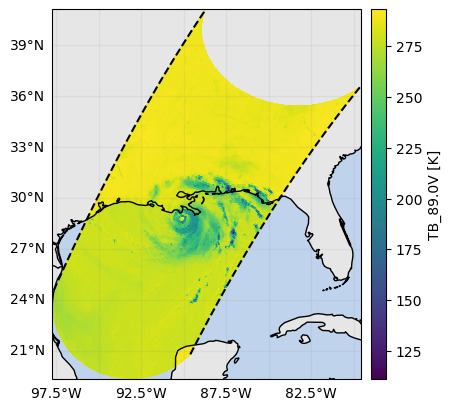

In [ ]:
ds_pmw["TB_89.0V"].gpm.plot_map()

You can directly plot a channels from the original TC PRIMED DataTree with:

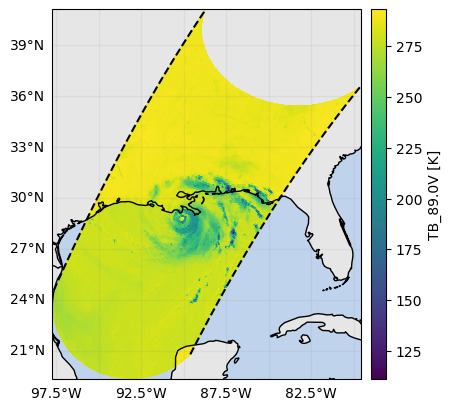

In [ ]:
dt["passive_microwave"]["S1"]["TB_89.0V"].gpm.plot_map()

GPM-API also provide `FacetGrid` capabilities, which allow you to plot multiple PMW channels in a single figure.

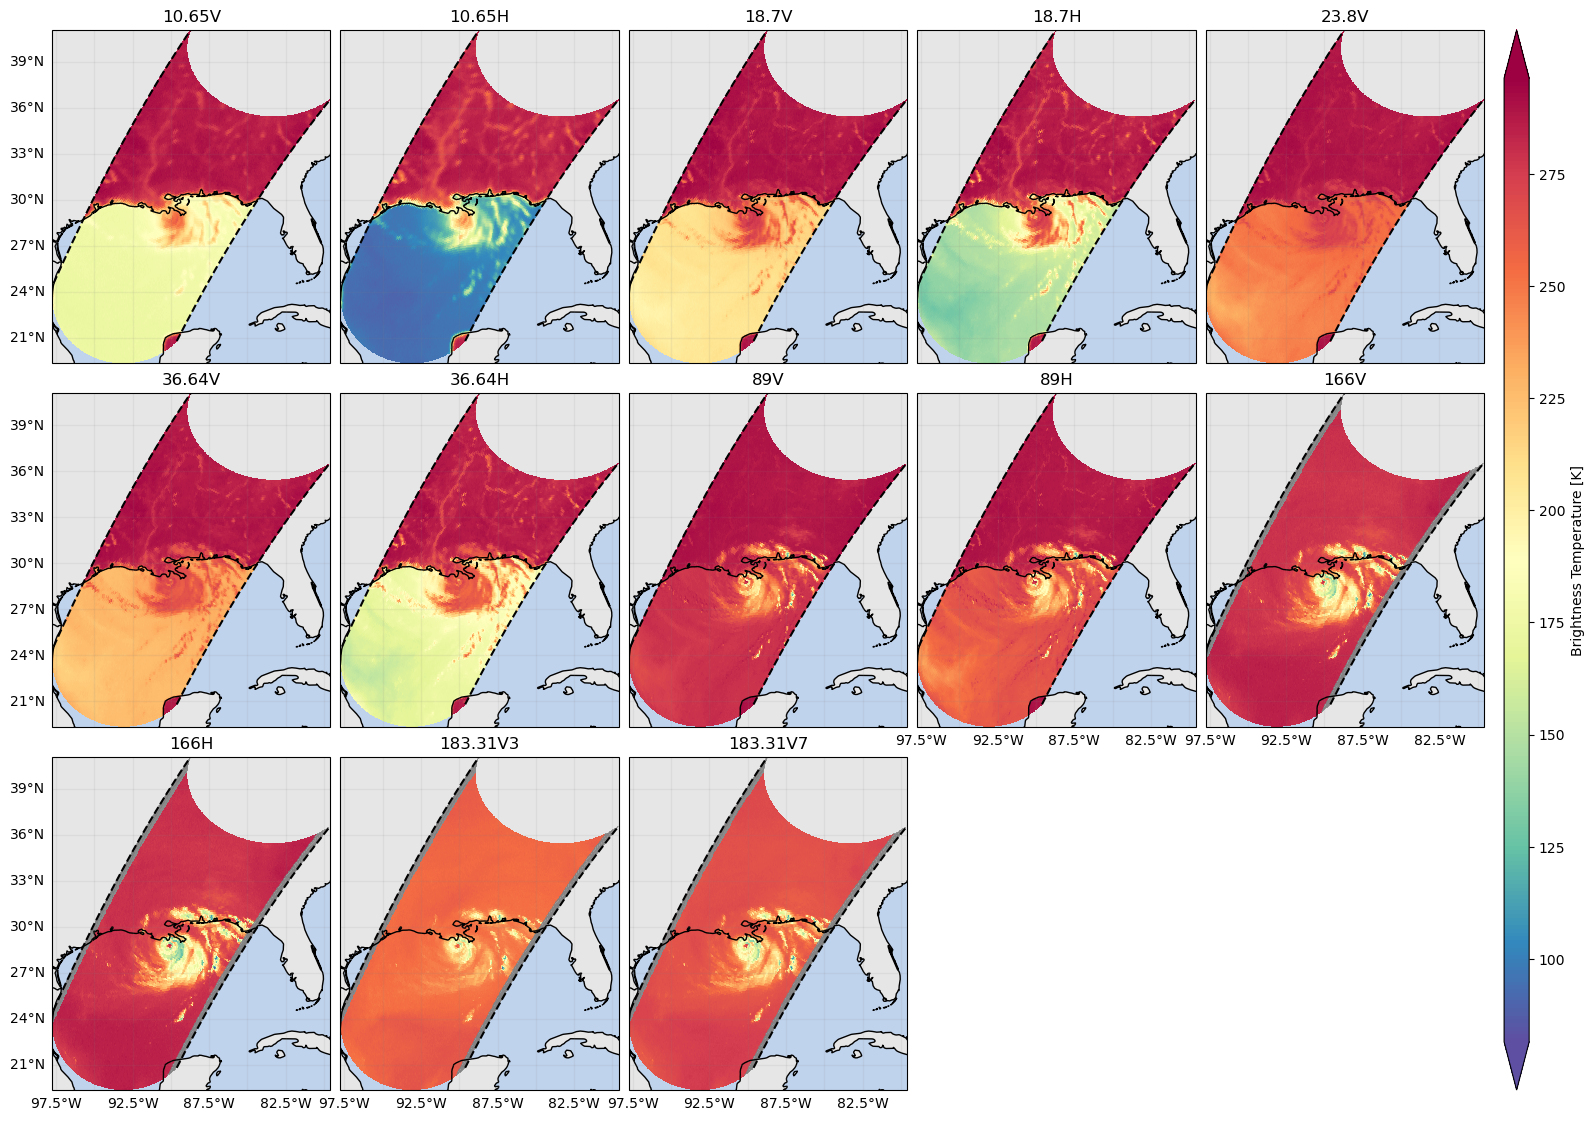

In [ ]:
fc = ds_pmw["Tc"].gpm.plot_map(col="pmw_frequency", col_wrap=5)
fc.remove_title_dimension_prefix()

With GPM-API, you can also easily retrieve and visualize various Polarization Difference (PD) and Polarization Corrected Temperature (PCT).

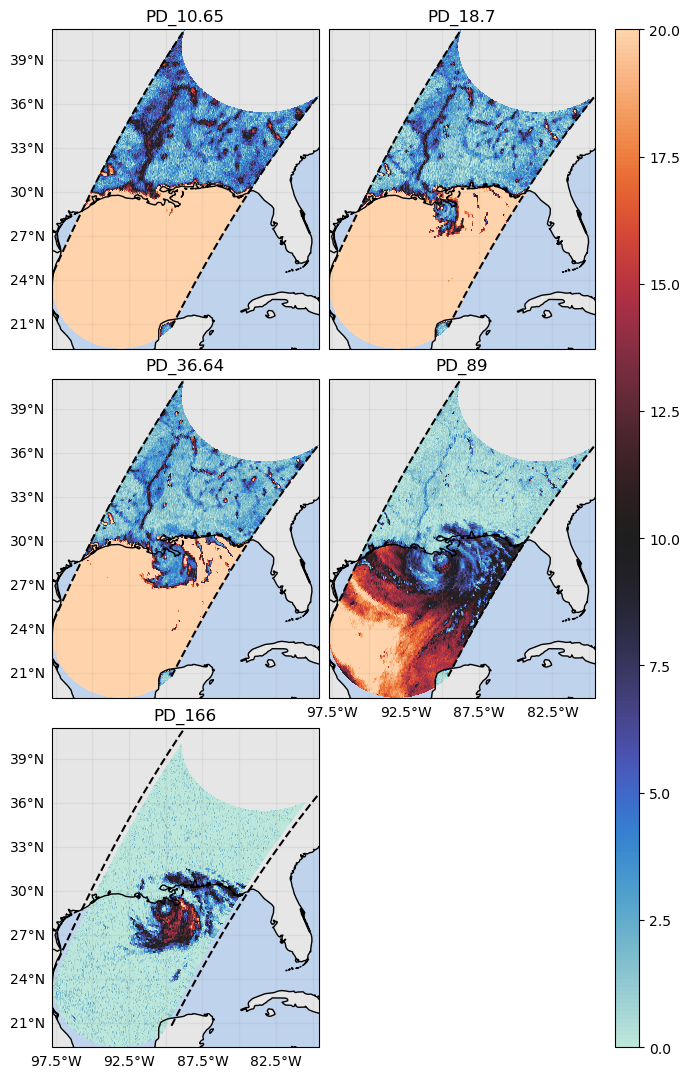

In [ ]:
# Retrieve PD
ds_pd = ds_pmw.gpm.retrieve("PD")
fc = ds_pd.to_array(dim="PD").gpm.plot_map(col="PD", col_wrap=2, vmin=0, vmax=20, cmap="icefire")
fc.remove_title_dimension_prefix()
plt.show()

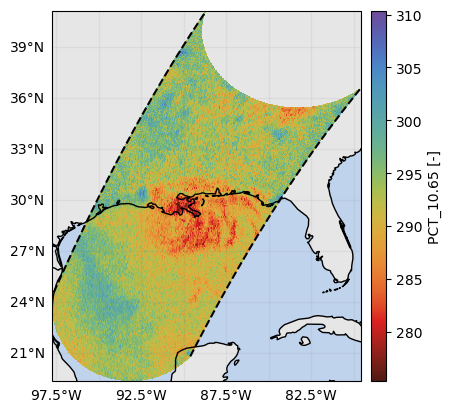

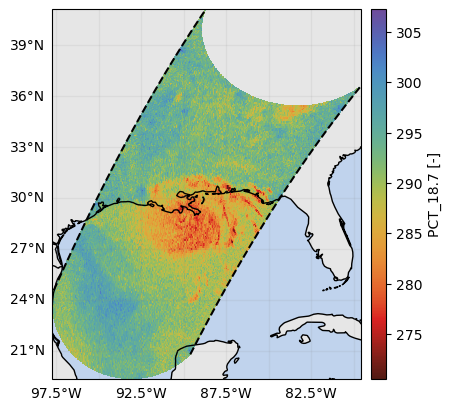

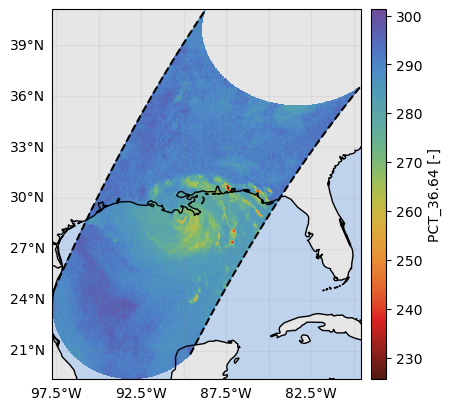

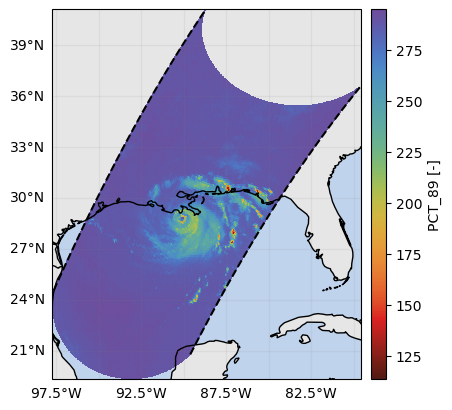

In [ ]:
# Retrieve PCTs
ds_pct = ds_pmw.gpm.retrieve("PCT")

for var in ds_pct.data_vars:
    ds_pct[var].gpm.plot_map(cmap="rainbow_PuBr_r")
    plt.show()

To facilitate the interpretation of the data, GPM-API also enable to generate a set of RGB composites on-the-fly.

In [ ]:
# Retrieve RGB composites
ds_rgb = ds_pmw.gpm.retrieve("rgb_composites")
ds_rgb

<xarray.Dataset> Size: 4MB
Dimensions:            (cross_track: 221, along_track: 153, rgb: 3)
Coordinates:
    latitude           (cross_track, along_track) float32 135kB 24.6 ... 36.51
    longitude          (cross_track, along_track) float32 135kB -97.63 ... -7...
    pmw_frequency      <U8 32B '18.7V'
    crsWGS84           int64 8B 0
  * rgb                (rgb) <U1 12B 'r' 'g' 'b'
Dimensions without coordinates: cross_track, along_track
Data variables:
    10 + 18 GHz        (rgb, cross_track, along_track) float32 406kB 0.4232 ....
    19 + 23 GHz        (rgb, cross_track, along_track) float32 406kB 0.3156 ....
    36 + 89 GHz        (rgb, cross_track, along_track) float32 406kB 0.1959 ....
    165 + 183 GHz      (rgb, cross_track, along_track) float64 812kB nan ... nan
    36 + 88 + 165 GHz  (rgb, cross_track, along_track) float32 406kB nan ... ...
    NRL_37             (rgb, cross_track, along_track) float32 406kB 0.0 ... ...
    NRL_89             (rgb, cross_track, along_track) float32 406kB 0.005833...

The Naval Research Laboratory (NRL) 37 and 89 GHz composites are commonly used to analyze the structure of tropical cyclones.

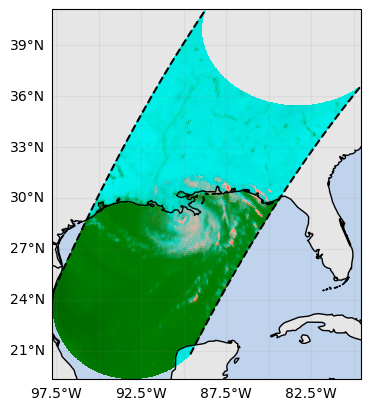

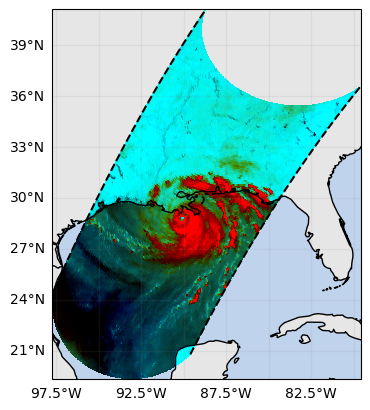

In [ ]:
ds_rgb["NRL_37"].gpm.plot_map(rgb="rgb")
ds_rgb["NRL_89"].gpm.plot_map(rgb="rgb")

All composites can be displayed in a single figure using the `FacetGrid` capabilities.

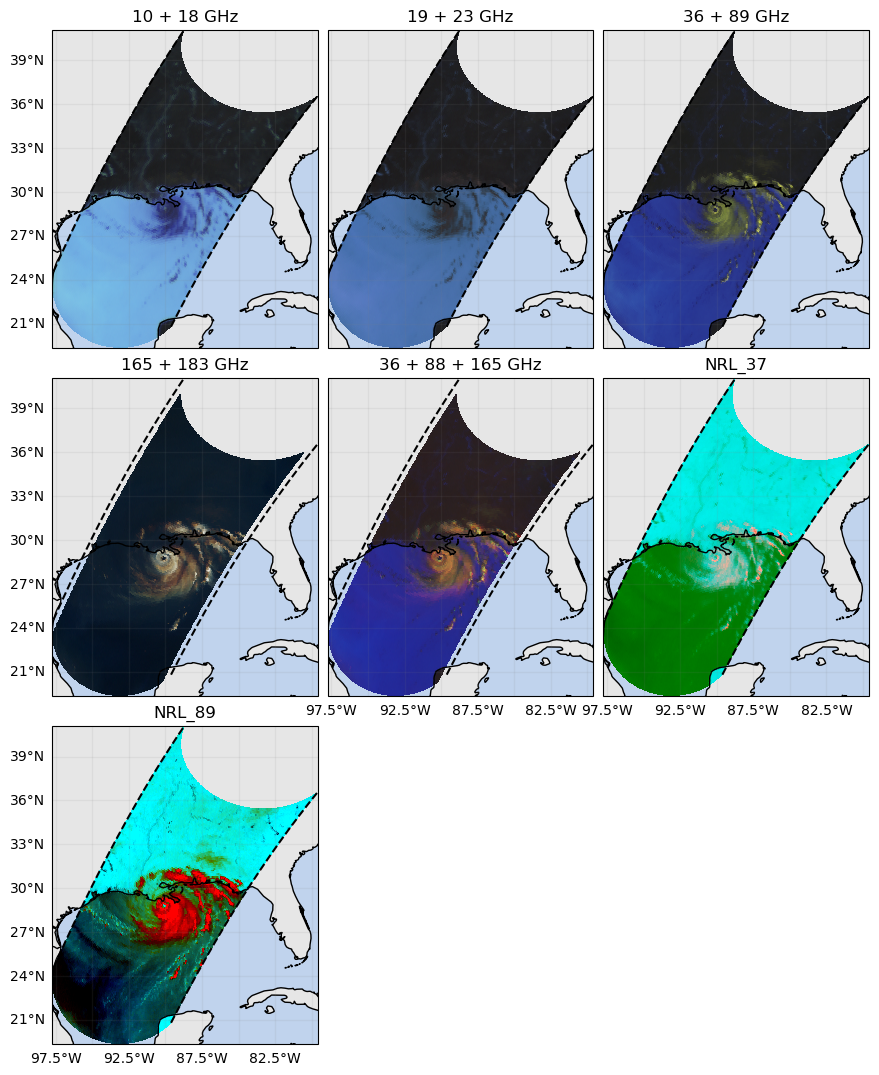

In [ ]:
fc = ds_rgb.to_array(dim="composite").gpm.plot_map(col="composite", col_wrap=3, rgb="rgb")
fc.remove_title_dimension_prefix()
plt.show()

## 4. GPROF PMW Precipitation Data

The `GPROF` node contains the GPROF PMW precipitation estimates. 

Here below we illustrate how GPM-API comes with a set of default colormap and colorbar settings which enable to quickly analyze all variables.

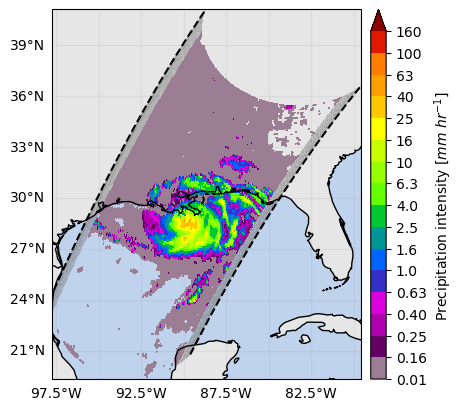

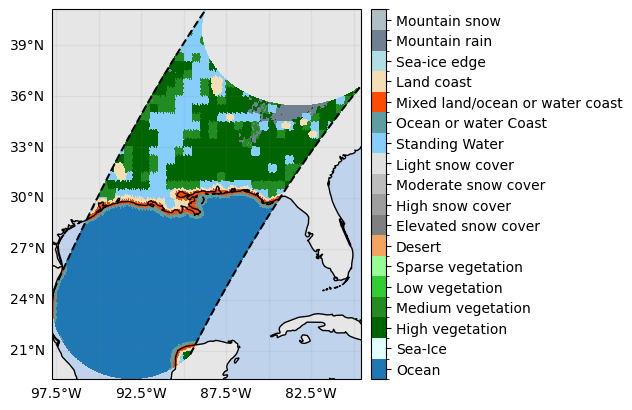

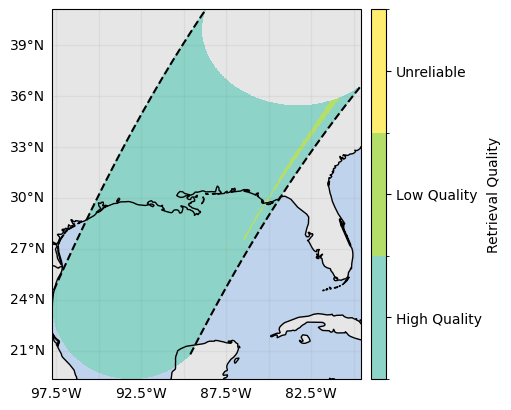

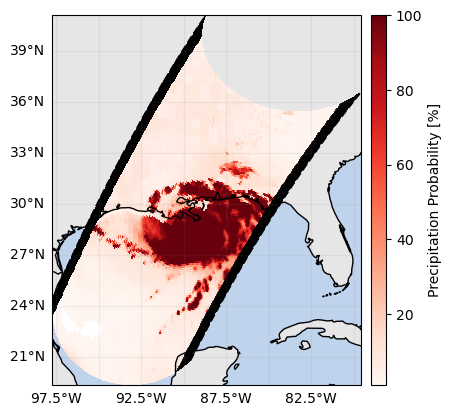

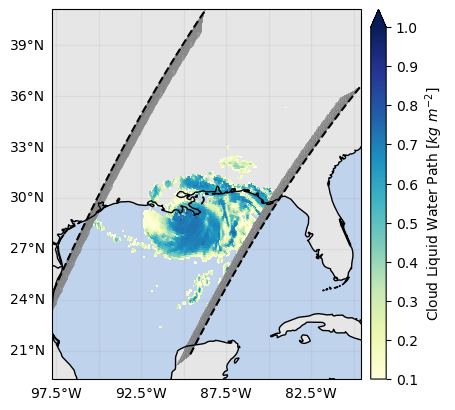

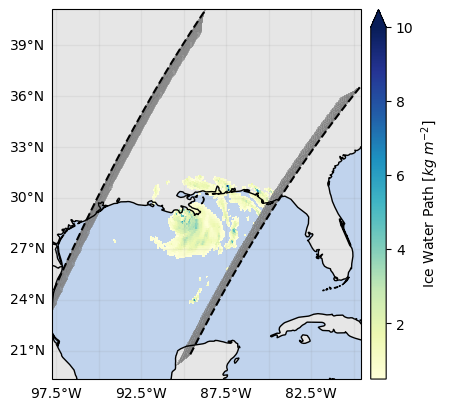

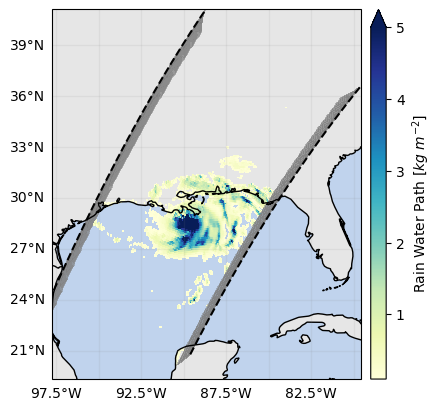

In [ ]:
ds_gprof = dt["GPROF"]["S1"].to_dataset()

ds_gprof["surfacePrecipitation"].gpm.plot_map()
ds_gprof["surfaceTypeIndex"].gpm.plot_map()
ds_gprof["qualityFlag"].gpm.plot_map()
ds_gprof["probabilityOfPrecip"].gpm.plot_map()
ds_gprof["cloudWaterPath"].gpm.plot_map()
ds_gprof["iceWaterPath"].gpm.plot_map()
ds_gprof["rainWaterPath"].gpm.plot_map()

## 5. CORRA Radar-Radiometer Data

The `radar_radiometer` node contains a set of variables derived from the GPM L2B CORRA product. 
The most relevant variables are the 3D radar reflectivity and rain rate fields.

Let's start by analyzing the near-surface fields:

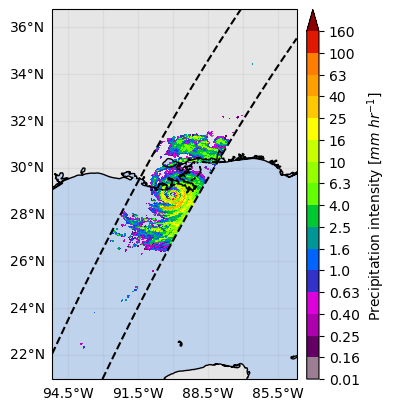

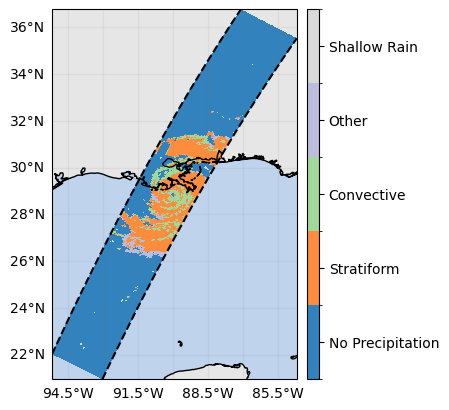

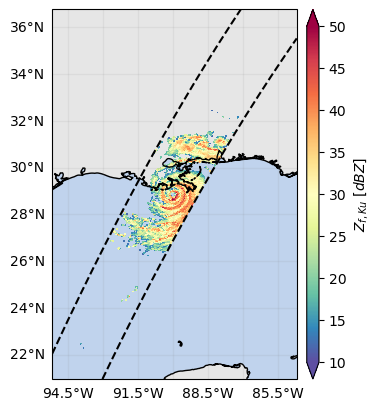

In [ ]:
ds_corra = dt["radar_radiometer"]["KuKaGMI"].to_dataset()
ds_corra["nearSurfPrecipTotRate"].gpm.plot_map()
ds_corra["mainprecipitationType"].gpm.plot_map()
ds_corra["correctedReflectFactor_Ku"].gpm.slice_range_at_height(
    2,
).gpm.plot_map()  # height is in km in TC PRIMED product !

Now we can locate for example the location where maximum reflectivity has been observed by the radar and draw a cross-section in the cross-track direction: 

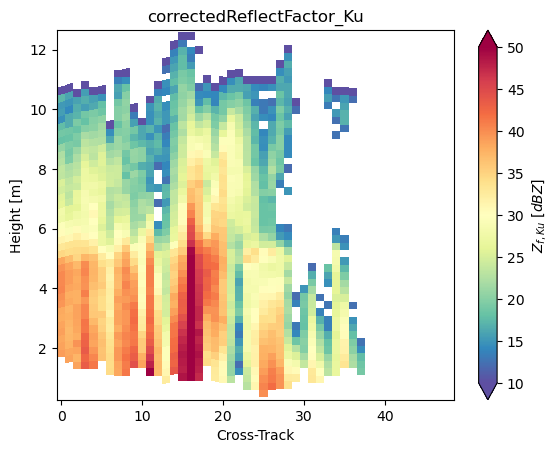

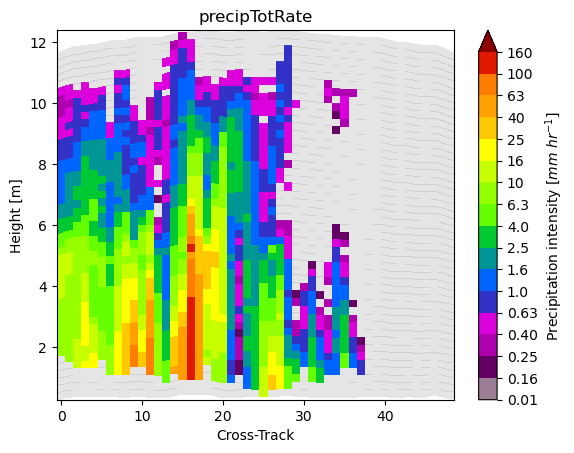

In [ ]:
isel_dict = ds_corra["correctedReflectFactor_Ku"].gpm.locate_max_value(return_isel_dict=True)
ds_corra["correctedReflectFactor_Ku"].isel({"along_track": isel_dict["along_track"]}).gpm.plot_cross_section()
ds_corra["precipTotRate"].where(ds_corra["precipTotRate"] > 0).isel(
    {"along_track": isel_dict["along_track"]},
).gpm.plot_cross_section()

## 6. GEO IR Data

The `infrared` node contains IR brightness temperature measured by VIS/IR imager onboard of a geostationary (GEO) satellite.

Now let's display the infrared imagery acquired at about the time of the PMW sensor overpass:

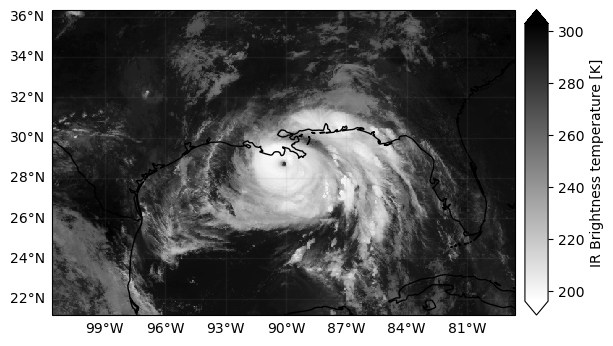

In [ ]:
ds_geo = dt["infrared"].to_dataset()
ds_geo["IRWIN"].gpm.plot_map()

## 7. Blending GEO/PMW/RADAR Data

Now let's create advanced visualization blending data from the various sensors:

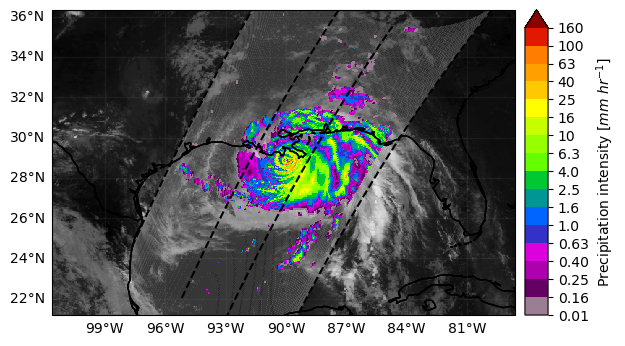

In [ ]:
# Blend PMW and RADAR
p = ds_gprof["surfacePrecipitation"].where(ds_gprof["surfacePrecipitation"] > 0.1).gpm.plot_map()
ds_corra["nearSurfPrecipTotRate"].gpm.plot_map(ax=p.axes, add_colorbar=False, add_gridlines=False, add_labels=False)
ds_geo["IRWIN"].gpm.plot_map(ax=p.axes, add_colorbar=False, add_gridlines=False, add_labels=False)

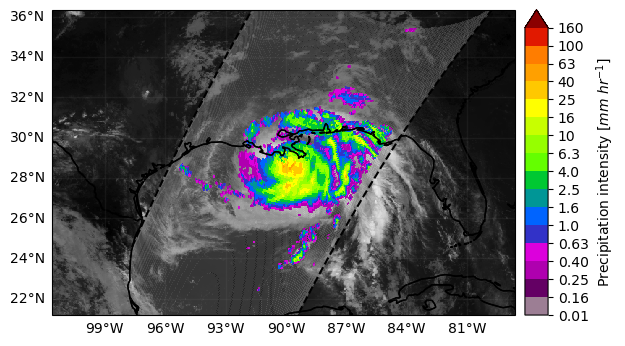

In [ ]:
# Blend GPROF and GEO IR
da = ds_gprof["surfacePrecipitation"].where(ds_gprof["surfacePrecipitation"] > 0.25)
p = da.gpm.plot_map()
ds_geo["IRWIN"].gpm.plot_map(ax=p.axes, add_colorbar=False, add_gridlines=False, add_labels=False)
plt.show()

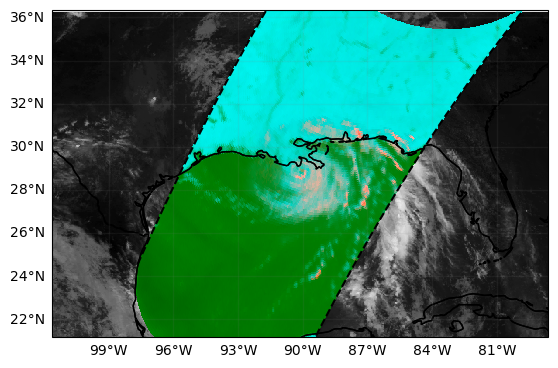

In [ ]:
# Blend PMW RGB composites and GEO IR
p = ds_rgb["NRL_37"].gpm.plot_map(rgb="rgb")
ds_geo["IRWIN"].gpm.plot_map(ax=p.axes, add_colorbar=False, add_gridlines=False, add_labels=False)
plt.show()

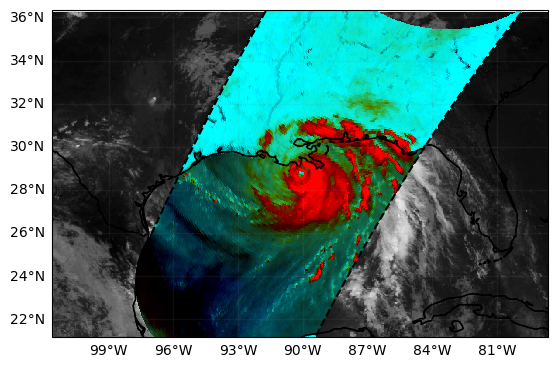

In [ ]:
p = ds_rgb["NRL_89"].gpm.plot_map(rgb="rgb")
ds_geo["IRWIN"].gpm.plot_map(ax=p.axes, add_colorbar=False, add_gridlines=False, add_labels=False)
plt.show()


We hope you liked this tutorial. 

If you plan analyze data from other sensors, be aware that you will have to adjust the name of some fields according to the channels frequencies available on the sensor you are interested in. GPM-API will take care of the rest: collocating data, retrieve available PMW features and RGB composites as well as ease your data manipulations and visualization.

Please visit the following websites for more information regarding the TC PRIMED dataset: 

- [TC PRIMED Homepage](https://rammb-data.cira.colostate.edu/tcprimed/) 
- [TC PRIMED AWS Homepage](https://registry.opendata.aws/noaa-nesdis-tcprimed-pds/)
- [TC PRIMED AWS S3 Explorer](https://noaa-nesdis-tcprimed-pds.s3.amazonaws.com/index.html)
- [TC PRIMED Manuscript](https://journals.ametsoc.org/view/journals/bams/104/11/BAMS-D-21-0052.1.xml)